In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

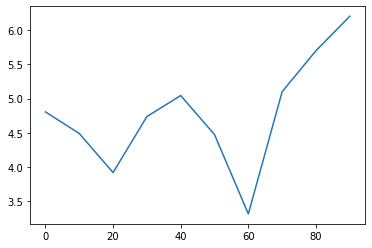

In [2]:
s = pd.Series(np.random.randn(10).cumsum() + 4.0, index=np.arange(0, 100, 10))
s.plot()

In [5]:
data = np.random.randn(10, 4).cumsum(0)

In [6]:
df = pd.DataFrame(data, index=np.arange(0, 100, 10), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.485665,-0.738014,-0.434689,0.525103
10,-2.269120,-0.362980,1.659831,1.428585
20,-3.780429,-0.897087,1.973947,1.049263
30,-3.658431,-1.713419,3.459624,2.266199
40,-4.514047,0.025965,2.928221,2.814857
50,-3.402798,0.217702,0.962263,4.284974
60,-3.375707,-0.993577,1.885905,1.372409
70,-2.930260,0.332951,1.544724,1.603392
80,-4.818749,0.095161,2.256489,0.947351
90,-3.150416,0.425877,3.079140,0.271419


<AxesSubplot:>

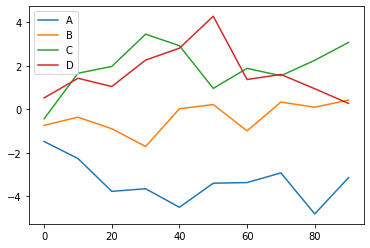

In [7]:
df.plot()

<AxesSubplot:>

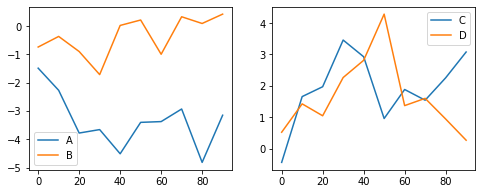

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
df.loc[:, ['A','B']].plot(ax=ax[0])
df.loc[:, ['C', 'D']].plot(ax=ax[1])

Some bar plots

<AxesSubplot:>

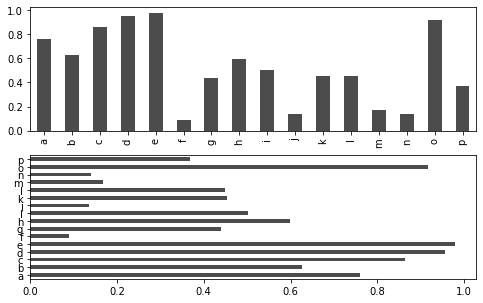

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(8, 5))
df2 = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
df2.plot.bar(ax=axes[0], color='k', alpha=0.7)
df2.plot.barh(ax=axes[1], color='k', alpha=0.7)

These were bar charts on a series. If we repeat this with a dataframe, we get pretty results by default.

In [34]:
df3 = pd.DataFrame(np.random.rand(6, 4),
                   index=['one', 'two', 'three', 'four', 'five', 'six'],
                   columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df3

Genus,A,B,C,D
one,0.110009,0.827104,0.332519,0.172801
two,0.317544,0.705066,0.340630,0.685653
three,0.200572,0.874175,0.041288,0.269037
four,0.639758,0.584769,0.696180,0.428834
five,0.021469,0.880702,0.324743,0.860876
six,0.979491,0.809805,0.446817,0.322008


<AxesSubplot:>

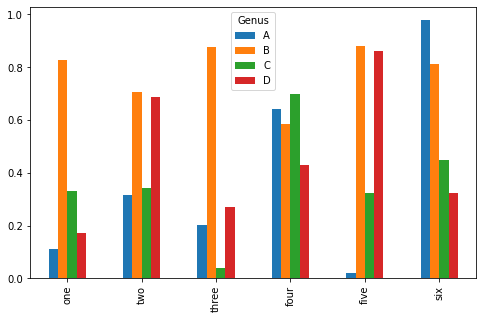

In [35]:
df3.plot.bar(figsize=(8, 5))

And stacked horizontally

<AxesSubplot:>

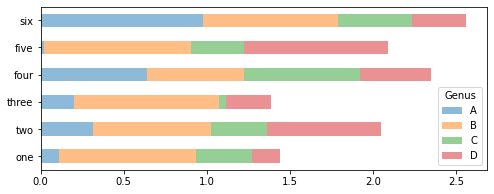

In [36]:
df3.plot.barh(stacked=True, alpha=0.5, figsize=(8, 3))

In [38]:
tips = pd.read_csv('pydata-book/examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [41]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [43]:
party_counts = party_counts.loc[:, range(2, 6)]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [44]:
party_percents = party_counts.div(party_counts.sum(1), axis=0)
party_percents

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

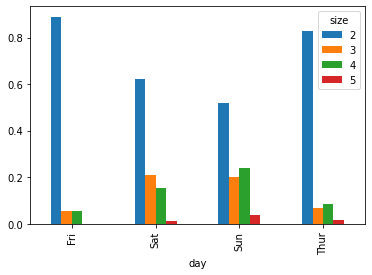

In [45]:
party_percents.plot.bar()

In [47]:
import seaborn as sns

In [48]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

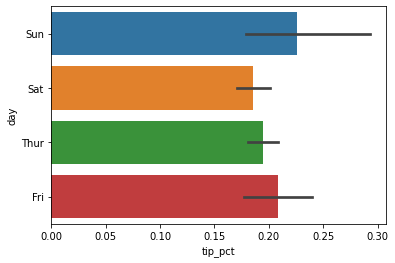

In [49]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

There is a `hue` parameter that allows a column to be used to further sub-divide.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

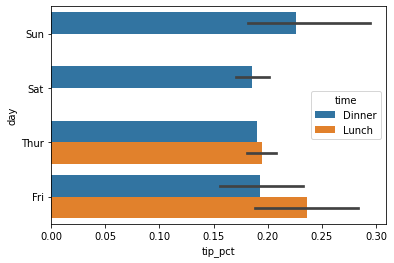

In [50]:
sns.barplot(x='tip_pct', y='day', data=tips, hue='time', orient='h')

Now, we can easily see that there are better tips available at lunch time...

Seaborn has automatically made some stylistic choices for us.  There are broad style arguments which make sensible decisions.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

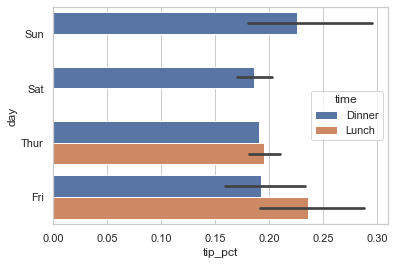

In [51]:
sns.set(style='whitegrid')
sns.barplot(x='tip_pct', y='day', data=tips, hue='time', orient='h')

<AxesSubplot:ylabel='Frequency'>

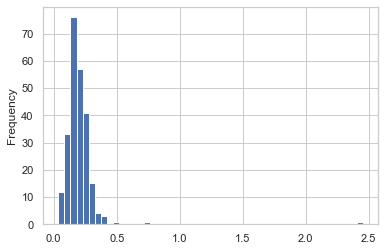

In [52]:
tips['tip_pct'].plot.hist(bins=50)

Density plots are available.

<AxesSubplot:ylabel='Density'>

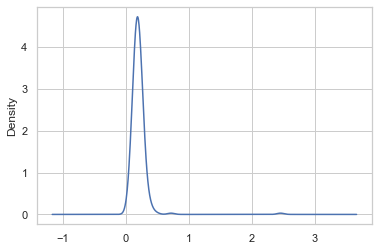

In [53]:
tips['tip_pct'].plot.density()

Using a bimodal distribution consisting of draws from two standard normal distributions.

/Users/davisda4/envs/dataviz/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

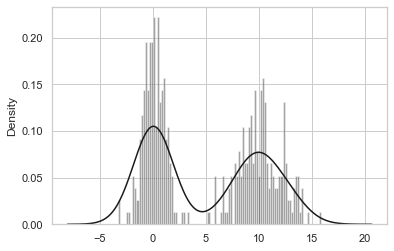

In [58]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or point plots
Scatter or point plots allow us to look at the relationship between two datasets.

In [60]:
macro = pd.read_csv('pydata-book/examples/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [61]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [62]:
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


<AxesSubplot:xlabel='m1', ylabel='unemp'>

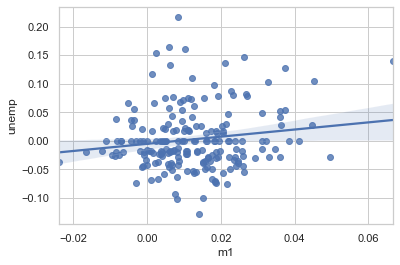

In [64]:
sns.regplot(x='m1', y='unemp', data=trans_data)

In data analysis, it is helpful to do scatterplots pairwise to reveal any relationships. This is called a "pair plot" or "scatter plot matrix".  Seaborn has a helpful "pairplot" function.

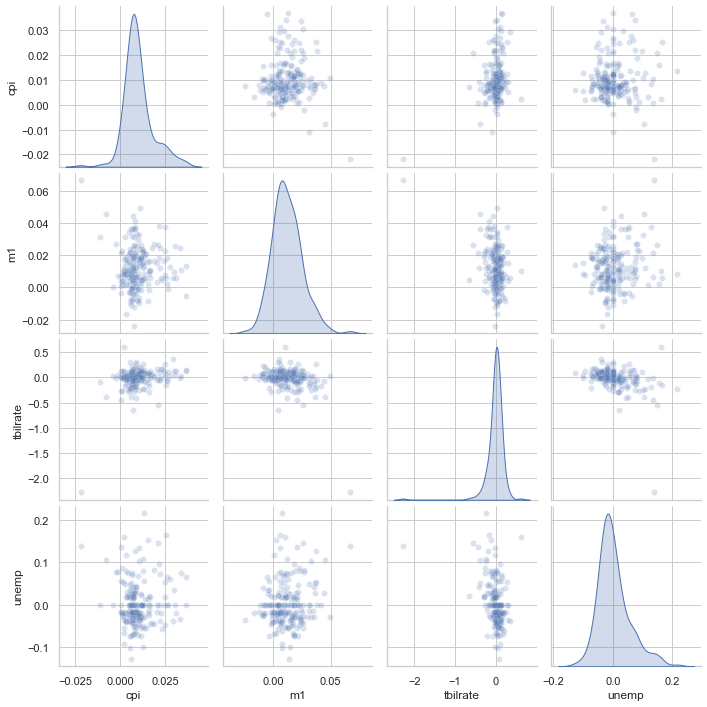

In [71]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

When a lot of the data is categorical, rather than numerical, one way to do data analysis is to use a "facet grid".  So, you can see whether there are differences in numeric columns based on a piece of categorical data.  The function is seaborn that does this is called "catplot".

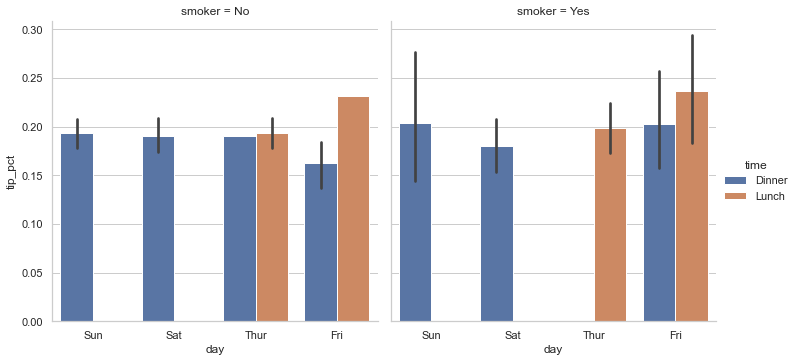

In [74]:
sns.catplot(data=tips[tips.tip_pct < 1], x='day', y='tip_pct', hue='time', col='smoker', kind='bar')

Seeing that the smoker category doesn't seem to make much difference, we can request a row based on day to look more closely at the function of time.

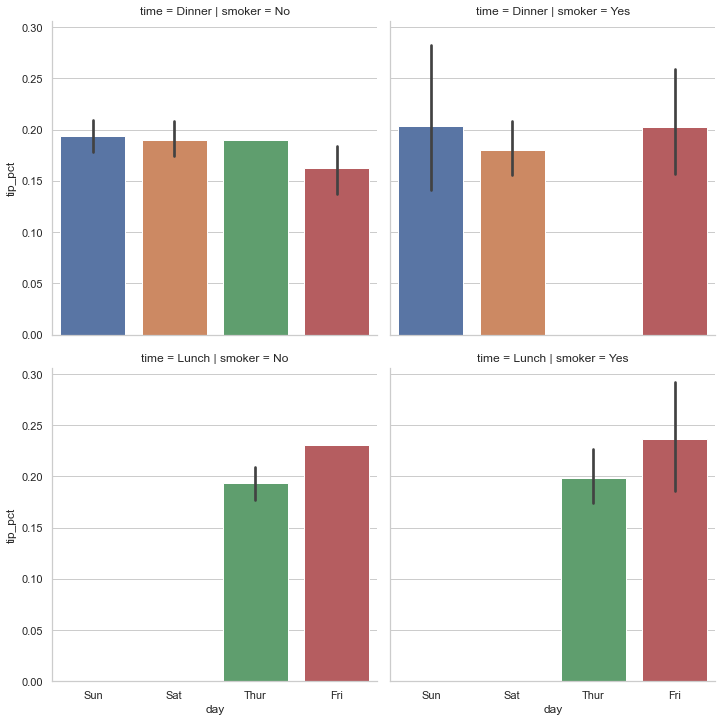

In [77]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

`catplot` supports other plot types, here is an example of a box plot which shows the median, quartiles, and outliers.

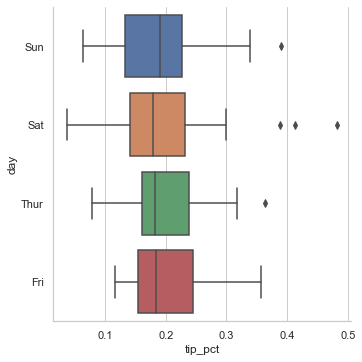

In [78]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

The author does mention "plotly" and "bokeh", but since his focus is on print publication, 
he does no more than point us in that direction.